# Welcome to Lab 0!

In this lab, we'll:
- Explore the jupyter notebook environment
- Understand the different types of cells
- Run a cell and edit some code
- See some handy jupyter shortcuts

## Important !
**Always save your work in jupyter.** Either via `File`> `Save and Checkpoint` or `Command` + `S`
**Jupyter cells need to run in sequence.** Running cells out of order (ie if you run a cell at the bottom of the page first) may cause code errors.

## Why do we use Jupyter?
The main reason we are using Jupyter notebooks is that they offer interactivity with code, without forcing you to learn to code right away. You can run pre-written blocks of code, and then, over time, as you gain confidence, modify those blocks of code, enventually working up to writing whole new blocks of code.

In addition, Jupyter offers a unified environment to work in, and the possibility of easy collaboration. 

### Code cells
Instead of writing a long script for the computer to compile and run, jupyter has **cells** which allow you to run parts of your code, edit and fix your code quickly, and see results immediately from a cell.

In Jupyter, a "cell" is each block of code or text.  You can easily edit each cell by double clicking on it, making any changes, and then go to `Cell` in the top menu, then click `Run Cells`

Test this out. Double click _this_ cell, change the below text to say "jupyter is an interactive coding environment" and then run the cell. 

jupyter is a coding environment

Now try running the previous cell again, but instead of clicking on `Cell` in the top menu, try running the cell using a keyboard shortcut: `Shift + Enter`

### _Markdown_ cells and _R_ cells
All cells in a notebook are code, but some (all the ones you have read so far included) are in a simple text format called Markdown, which enables you to enter nicely formatted text.

**This is a Markdown cell.**

You can think of Markdown cells as text, where you can type freely. Markdown is not code, but there are little things you have to do in order to make things **bold** or *italic* or 
- bulleted 
- like 
- this

Markdown is frequently used, and you might see files that have a `.md` ending to them. Those are markdown files. 

If you double click on this cell, can you see/guess how the word **bold** is made bold?

Now try running the cell below. What happens?

In [ ]:
This is my map. This is for assignment 1

To have a cell run as a Markdown cell, you need to tell the notebook that it is a Markdown cell. By default because this notebook is an R notebook, all new cells created are `code` cells and are interpreted by the notebook as R (a programming language) code.

To turn a cell into a Markdown cell, go to `Cell` > `Cell Type` > `Markdown`.
The shortcut to doing this is hitting `Esc` to enter command mode, and typing `m`.

Try this for the above cell.

## Finally some R code

OK, so nicely formatted text is all very well, but we could do that in a word processor, now we come to the real point of using a notebook, which is to run blocks of code. Below is an R code cell.

In [ ]:
# Anything with a # in front of it is not executed by the computer, it's a comment

# Let's first make a variable called a
a <- 8

The above cell set the value of a variable called `a` to be 8. We can check that the notebook remembers this by asking for the value of `a`

In [ ]:
a

In [ ]:
# Now let's make another variable called b
b <- 10

In [ ]:
# What's a + b?

a + b

We can perform other arithmetic functions easily in R. For example, according to the R documents, we can do multiplication using `x * y`. Add a cell below and try mutiplying variables a and b

In [ ]:
# An important thing to note is that variables are "global", that is, 
# their values are carried over from one cell to another. For example:

d <- a+b

In [ ]:
d + b 
#Should be 28

## Some quick map plotting

Let's try reading a simple shape file. For those who haven't run into shape files before they are a popular file format for storing geographical data. First, we need to import an R package that will help us do that. 

You can think of R packages as bundles of commands that enable us to do particular specialized things. They aren't part of the basic functionality of R because including commands for all the things that you might want to do in R would make it a very large and unwieldy platform.

In [ ]:
library(rgdal)

In [ ]:
auckland <- readOGR("data/tb_0006_bycau06.shp")

The result tells us that we successfully read a file that contains 103 features (i.e. geographical things), and that each of those features has 19 'fields' of information associated with it.

We can see a list of the field names using the `names` function.

In [ ]:
names(auckland)

We can see the first 5 rows of the data table with the `head` command.

In [ ]:
head(auckland)

Or, we can see the data nicely formatted by viewing it as a `data.frame`.

In [ ]:
#Here's the expanded view
auckland_df <- data.frame(auckland)
auckland_df

We can use the plot function to plot the data, and, since these data are geographical, we will get a map.

In [ ]:
plot(auckland)

## Chloropleth map

We can also make simple chloropleth maps using plot. There's column in our data called `TB_RATE`, or tuberculosis rate, so let's make a simple chloropleth map of that.

In [98]:
# First, let's use a color library called RColorBrewer.
# Instead of defining colors individually for each category, we can use RColorBrewer
library(RColorBrewer)

In [99]:
# What's the data look like?
attach(auckland_df)

#Let's try and sort the data by TB_RATE
auckland_tb_rate <- auckland_df[order(TB_RATE),] 
auckland_tb_rate

The following objects are masked from auckland_df (pos = 3):

    AREA, AU_NAME, AU_NO, OBJECTID, P_20_TO_39, P_40_TO_49, P_60_TO_79,
    P_OVER_80, P_UNDER_20, Shape_Area, Shape_Leng, T019, T2039, T4059,
    T6079, T80P, TB_CASES, TB_RATE, TOTAL

The following objects are masked from auckland_df (pos = 4):

    AREA, AU_NAME, AU_NO, OBJECTID, P_20_TO_39, P_40_TO_49, P_60_TO_79,
    P_OVER_80, P_UNDER_20, Shape_Area, Shape_Leng, T019, T2039, T4059,
    T6079, T80P, TB_CASES, TB_RATE, TOTAL

The following objects are masked from auckland_df (pos = 5):

    AREA, AU_NAME, AU_NO, OBJECTID, P_20_TO_39, P_40_TO_49, P_60_TO_79,
    P_OVER_80, P_UNDER_20, Shape_Area, Shape_Leng, T019, T2039, T4059,
    T6079, T80P, TB_CASES, TB_RATE, TOTAL

The following objects are masked from auckland_df (pos = 6):

    AREA, AU_NAME, AU_NO, OBJECTID, P_20_TO_39, P_40_TO_49, P_60_TO_79,
    P_OVER_80, P_UNDER_20, Shape_Area, Shape_Leng, T019, T2039, T4059,
    T6079, T80P, TB_CASES, TB_RATE, TOTAL

The foll

,OBJECTID,AU_NO,AU_NAME,Shape_Leng,Shape_Area,AREA,TOTAL,P_UNDER_20,P_20_TO_39,P_40_TO_49,P_60_TO_79,P_OVER_80,T019,T2039,T4059,T6079,T80P,TB_CASES,TB_RATE
16,67,519500,Penrose,12975.082,4203096.5,Penrose,657,0.24657534,0.4520548,0.2420091,0.05479452,0.004566210,162,297,159,36,3,0,0
19,77,517002,Glen Innes East,4982.479,1133068.5,Glen Innes East,2922,0.40349076,0.2720739,0.2330595,0.07494866,0.016427105,1179,795,681,219,48,0,0
29,106,515432,St Lukes North,2273.338,199483.5,St Lukes North,729,0.21399177,0.5102881,0.2263374,0.03703704,0.012345679,156,372,165,27,9,0,0
36,117,515902,Parnell West,8393.345,2106834.0,Parnell West,4779,0.13873195,0.4318895,0.2812304,0.12931576,0.018832392,663,2064,1344,618,90,0,0
38,119,515901,Parnell East,6218.051,891671.5,Parnell East,2145,0.19020979,0.3146853,0.3272727,0.14545454,0.022377622,408,675,702,312,48,0,0
47,150,516102,Waitaramoa,6358.960,1561773.0,Waitaramoa,3819,0.27808327,0.2144540,0.3315004,0.13982718,0.036135114,1062,819,1266,534,138,0,0
49,153,516101,Remuera West,4055.845,911479.0,Remuera West,3204,0.22565543,0.2696629,0.3230337,0.16104869,0.020599251,723,864,1035,516,66,0,0
53,163,519300,One Tree Hill Central,7284.882,3058679.0,One Tree Hill Central,2706,0.25831486,0.2361419,0.3137472,0.13192905,0.059866962,699,639,849,357,162,0,0
59,180,516700,St Heliers,6113.370,1822227.0,St Heliers,4689,0.20921305,0.2015355,0.3326935,0.20153551,0.055022393,981,945,1560,945,258,0,0
64,190,514200,Newton,2629.038,432389.0,Newton,1218,0.07389163,0.7389163,0.1527094,0.02955665,0.004926108,90,900,186,36,6,0,0




**Question**:

- What's the lowest TB_RATE?
- What's the highest TB_RATE?

In [100]:
# Let's also import a tool, classInterval, 
# to help us break up that data, instead of us doing all the math manually.
library(classInt)

In [101]:
colors <- brewer.pal(4, "Greens")

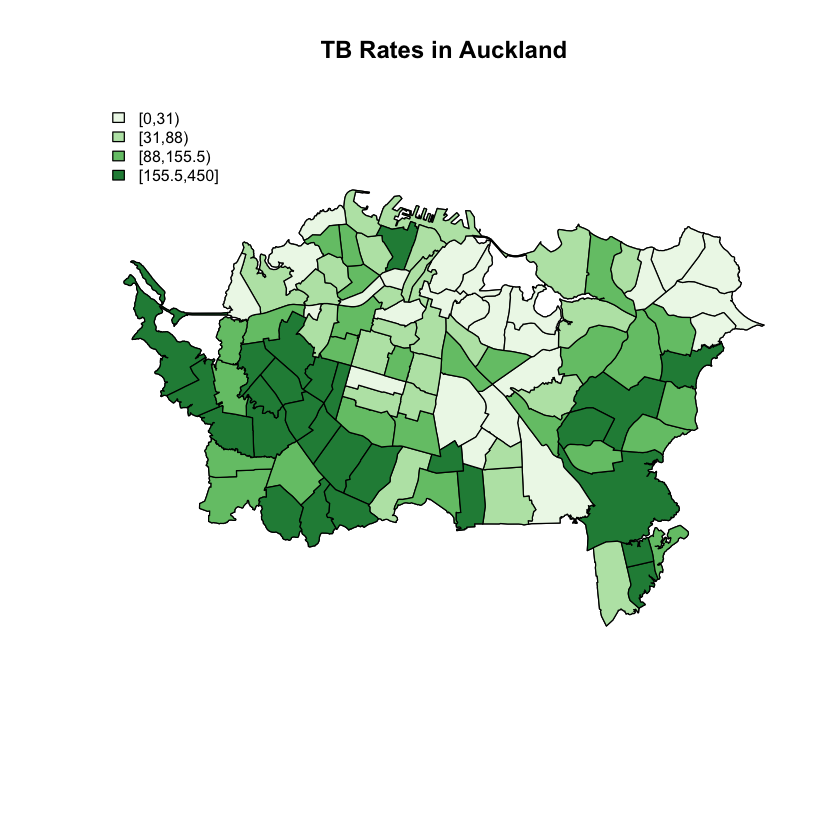

In [103]:
classes <- classIntervals(auckland$TB_RATE, 4, style="quantile")
colorcodes <- findColours(classes, colors)
plot(auckland)
plot(auckland, col=colorcodes, add=T)
title(main="TB Rates in Auckland")
legend(x='topleft',y=NULL, legend=names(attr(colorcodes, "table")),
    fill=attr(colcode, "palette"), cex=0.8, bty="n")

### Keyboard shortcuts in jupyter

Keyboard shortcuts in jupyter are helpful so that you don't have to click on the top menu all the time. A short list of helpful keyboard shortcuts are located here:

http://maxmelnick.com/2016/04/19/python-beginner-tips-and-tricks.html

Some of the most helpful ones for us will be in `Command` Mode. You can tell when a cell is in command mode by the vertical color bar on the side of the cell -- it will be blue when it's in command mode.

- `shift` + `enter` run cell, select below
- `ctrl` + `enter` run cell
- `option` + `enter` run cell, insert below
- `d` , `d` delete selected cell
- the `?` before a function will give you helpful information about it

In [ ]:
#Try running this cell. 
?plot

**Question**:
- What's the `Usage` of plot?

**Try deleting this cell using the `d`,`d` shortcut!**